## TODO 1: EDA
* Sử dụng bộ data [Kaggle - Ecommerce Customers](https://www.kaggle.com/srolka/ecommerce-customers)

## EDA
* Univariate Analysis: 
    - Trình bày các quan sát về phân phối của các biến
    - Bộ Data có các điểm nào cần chú ý (để thực hiện trong bước Data Processing)?
* Multivariate Analysis: 
    - Trình bày các tương tác thú vị giữa các biến, giải thích thêm theo ý kiến và suy nghĩ của bạn
## Customer Yearly Amount Spent
Yếu tố chúng ta quan tâm nhất là `Yearly Amount Spent` (Số tiền giao dịch của khách hàng trong năm)

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Load DATA
data_file_path = "Ecommerce Customers.csv"
customer_df = pd.read_csv(data_file_path)
customer_df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [51]:
# Summary
print('Summary:')
print(customer_df.shape)
customer_df.dtypes

Summary:
(500, 8)


Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [52]:
# Summary
print('Summary:')
customer_df.describe(percentiles= [.25, .5, .75, .95], include='all')

Summary:


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,salazarkaren@hotmail.com,"311 Savannah Ramp Suite 245\nCarlsonbury, LA 0...",Cyan,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [53]:
# Tỉ lệ Missing
def missing_exploration(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_exploration(customer_df)

,Total,Percent
Yearly Amount Spent,0,0.0
Length of Membership,0,0.0
Time on Website,0,0.0
Time on App,0,0.0
Avg. Session Length,0,0.0
Avatar,0,0.0
Address,0,0.0
Email,0,0.0


In [3]:
# Filter columns by dtype numerical or categorical
categorical = [col for col in customer_df.columns.tolist() if customer_df[col].dtype == 'object' ]
numerical = [col for col in customer_df.columns.tolist() if col not in categorical]
print(categorical)
print(numerical)

['Email', 'Address', 'Avatar']
['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


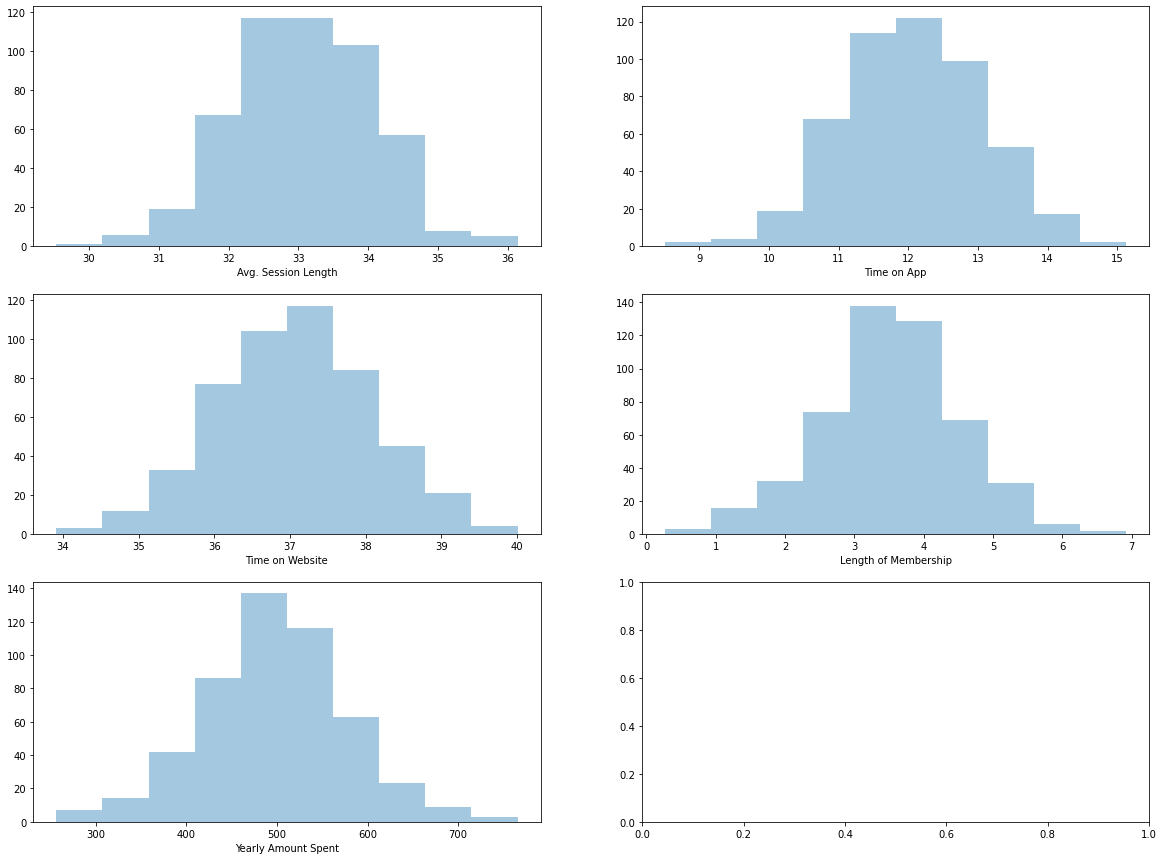

In [7]:
# Histograms
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, subplot in zip(numerical, ax.flatten()):
    sns.distplot(a = customer_df[i], label = i, kde = False, ax = subplot, bins = 10)

### TODO #1: EDA - Univariate Analysis

### Summary:

1. Bộ dữ liệu ghi lại các thông tin về khách hàng, các quan sát thời gian khách hàng sử dụng khi xem sản phẩm trên Web và trên App và Trung bình giá trị tiêu dùng hằng của khách hàng
2. Bộ data có 500 dòng dữ liệu và 8 cột dữ liệu, trong đó có 3 cột category và 5 cột numeric
3. Tất các các cột đều không có giá trị missing

### Univariable

1. Cột 'Avg. Session Length': Thời lượng trung bình 1 session của khách hàng
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (29.5, 36.139)
* Giá trị mean và giá trị q50 khá gần nhau (33.053194, 33.082008)
* độ lệch chuẩn std rất nhỏ (chỉ bằng 1/33 giá trị trung bình)
* giá trị tập trung trong khoảng 32.2 đến 33.4
> Phân phổi của Avg. Session Length khá chuẩn, không có outlier, không có giá trị missing

2. Cột 'Time on App': Thời lượng trung bình 1 session của khách hàng xem bằng App
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (8.508152, 15.126994)
* Giá trị mean và giá trị q50 khá gần nhau (12.052488, 11.983231)
* độ lệch chuẩn std nhỏ (chỉ bằng 1/12 giá trị trung bình)
* giá trị tập trung trong khoảng 11.2 đến 12.5
> Phân phổi khá chuẩn, không có outlier, không có giá trị missing

3. Cột 'Time on Website': Thời lượng trung bình 1 session của khách hàng xem bằng Web
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (33.913847, 40.005182)
* Giá trị mean và giá trị q50 gần trùng nhau (37.060445, 37.069367)
* độ lệch chuẩn std nhỏ (chỉ bằng 1/37 giá trị trung bình)
* giá trị tập trung trong khoảng 36.3 đến 37.5
> Phân phổi hình chuông, không có outlier, không có giá trị missing

4. Cột 'Length of Membership': Tuổi thọ thành viên
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (0.269901, 6.922689)
* Giá trị mean và giá trị q50 gần trùng nhau (3.533462, 3.533975)
* độ lệch chuẩn std lớn 0.999278 (gần 1/4 giá trị trung bình)
* giá trị tập trung trong khoảng 3.0 đến 4.2
> Phân phổi hình chuông nhọn, không có outlier, không có giá trị missing

5. Cột 'Yearly Amount Spent': Trung bình chi tiêu hằng năm
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (0.269901, 6.922689)
* Giá trị mean và giá trị q50 gần trùng nhau (499.314038, 498.887875)
* độ lệch chuẩn std lớn 79.314782(gần 1/6 giá trị trung bình)
* giá trị tập trung trong khoảng 450 đến 550
> Phân phổi hình chuông, không có outlier, không có giá trị missing

> Bộ Data đáng tin cậy

In [4]:
def show_correlation_matrix(df, vmin_val = -1, vmax_val = 1):
    f, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(df.corr(),cmap = "YlGnBu",  annot=True ,vmin= vmin_val, vmax = vmax_val)
    plt.show()

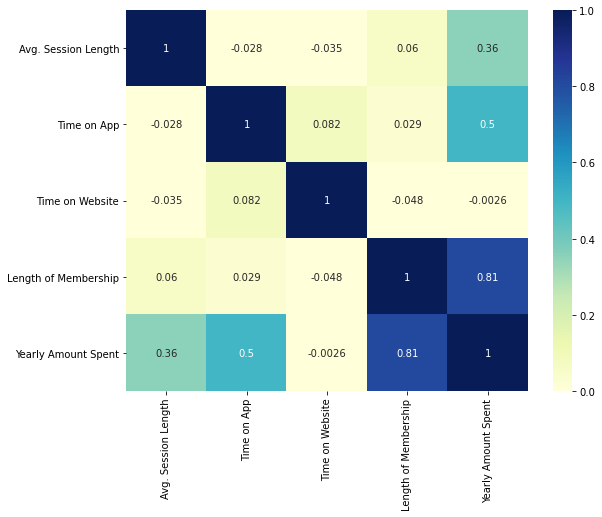

In [5]:
show_correlation_matrix(customer_df,vmin_val = 0)

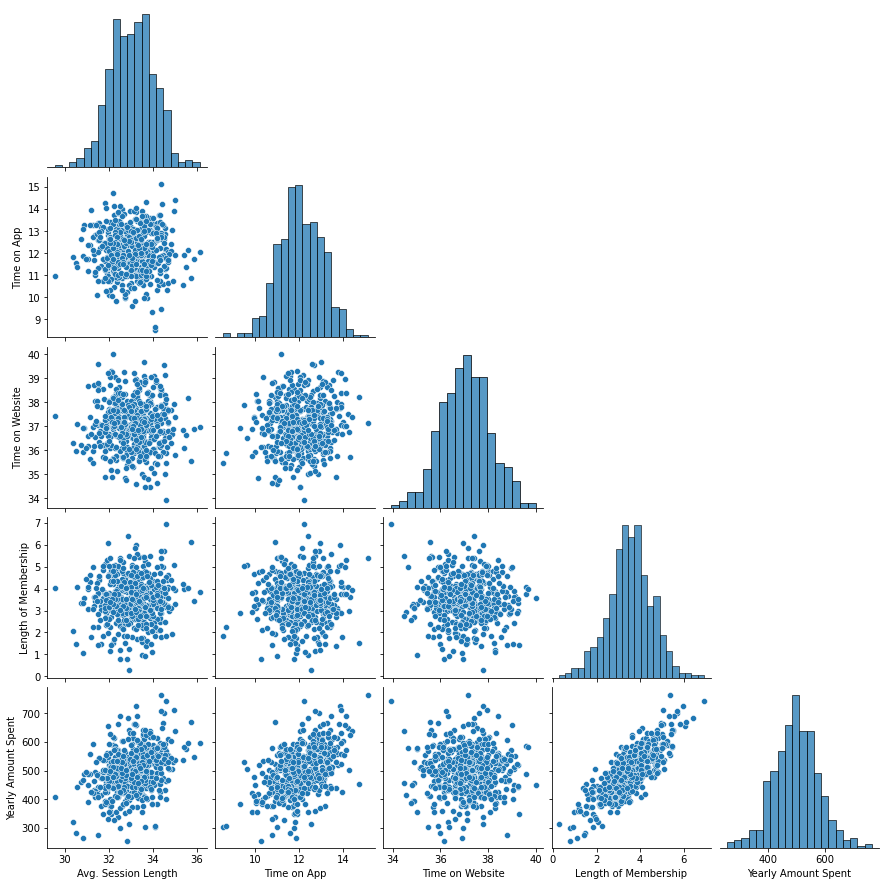

In [42]:
sns.pairplot(customer_df, corner=True);

Relations between 'Year Amount Spent' and Length of Membership', 'Time on App', 'Avg. Session Length' 


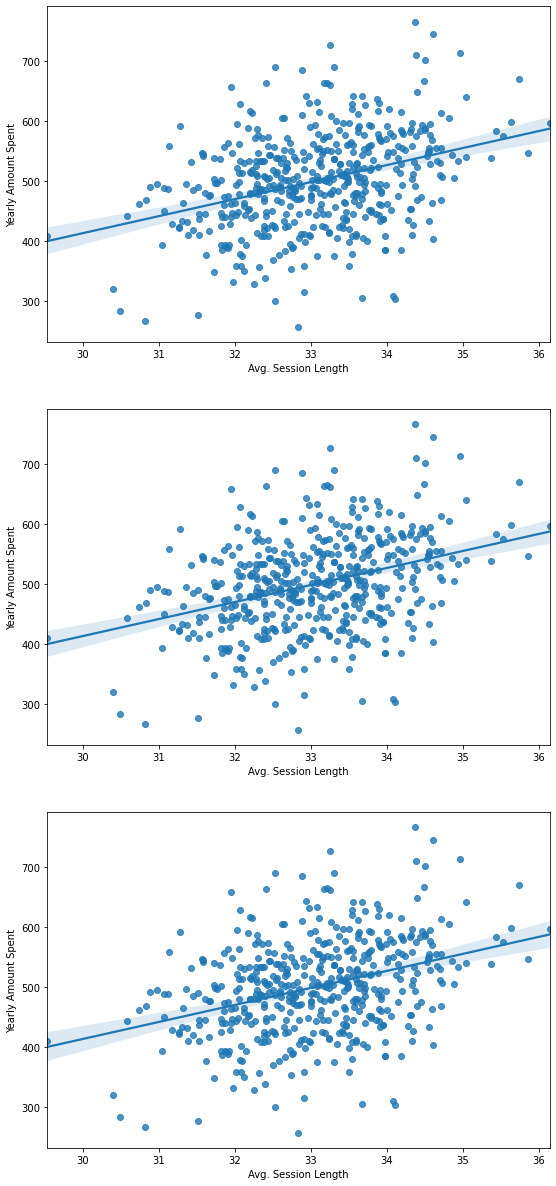

In [6]:
# Scatter plot 'Year Amount Spent' vs 'Length of Membership'
# Scatter plot 'Year Amount Spent' vs 'Time on App'
# Scatter plot 'Year Amount Spent' vs 'Avg. Session Length'
print("Relations between 'Year Amount Spent' and Length of Membership', 'Time on App', 'Avg. Session Length' ")

scatter_lst = ['Length of Membership','Time on App','Avg. Session Length']
fig, ax = plt.subplots(3, 1, figsize=(9, 21))

for i, subplot in zip(scatter_lst, ax.flatten()):
    sns.regplot(x = customer_df['Avg. Session Length'], y = customer_df['Yearly Amount Spent'], ax = subplot)

plt.show()

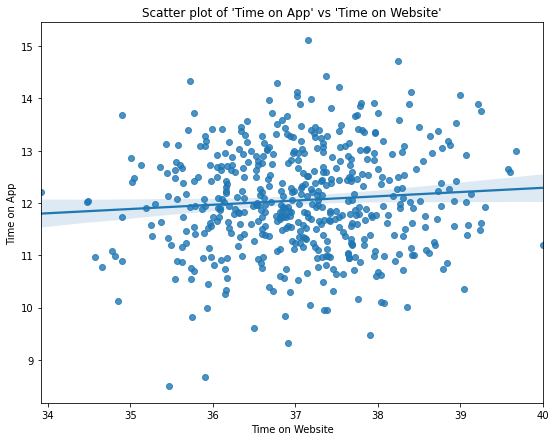

In [12]:
plt.figure(figsize = (9,7))
plt.title("Scatter plot of 'Time on App' vs 'Time on Website'")
sns.regplot(x = customer_df['Time on Website'], y = customer_df['Time on App'])
plt.show()

### TODO #1: EDA - Multivariate Analysis
### Summary:

1. Trung bình chi tiêu hằng năm của khách hàng 'Yearly Amount Spend' tỉ lệ thuận mạnh mẽ với tuổi thọ thành viên 'Length of Membership' (0.81), độ dài trung bình của session khi khách hàng lướt bắng APP 'Time on APP' (0.5) và sau đó là độ dài trung bình của mỗi lượt lướt 'Avg. Session Lenght' (0.36)

2. Các thuộc tính khác không có tương quan rõ ràng với nhau

### Multivariate

1. 'Yearly Amount Spent' tỉ lệ thuận mạnh mẽ với 'Lenght of Membership'
* điều này khá dễ hiểu bởi vì khách hàng càng trung thành thì càng có xu hướng chỉ mua sản phẩm của nhà sản xuất đó.

2. 'Yearly Amount Spent' tỉ lệ thuận với 'Time on App':
* điều này khá thú vị, nó thể hiện lên thói quen chốt deal của khách hàng. Có vẻ như khách hàng có xu hướng đặt mua trên App nhiều hơn. Có lẽ là việc kết hợp các tiện ích khác như (thanh toán, gọi điện) trên App (do thường được cài đặt trên các smartphone) tạo cho khách hàng thuận lợi hơn trong việc chốt deal, hoặc có lẽ do smartphone được mang theo bên mình nhiều hơn nên tỉ lệ chốt deal cũng được xảy ra nhiều hơn.

3. 'Yearly Amount Spent' tỉ lệ thuận với 'Avg. Session Lenght':
* điều này cũng dễ hiểu vì khi cang lướt qua sản phẩm nhiều thì khách hàng có xu hướng chi tiêu cho sản phẩm nhiều hơn.

4. 'Yearly Amount Spent' tỉ lệ không rõ ràng với 'Time on Web':
* Có lẽ đa số các khách hàng chỉ lên Web để xem thông tin về sản phẩm và dịch vụ là chủ yếu thứ ko để chốt deal

### TODO #1: EDA - Multivariate Analysis
Tự đặt các giả thuyết về yếu tố ảnh hướng (trong bộ data) và làm các bước phân tích, vẽ các biểu đồ để tìm hiểu các giả thuyết đó.
1. Xem tương quan giữa Amount Spent với Address
2. Xem tương quan giữa Amount Spent với Email (tên miền)
3. Xem tương quan giữa Amount Spent với các nhóm khách hàng (dựa vào Length of Membership)
4. Phân tích thói quen sử dụng Intenet đối với các nhóm khách hàng khác nhau (dựa vào length of Membership)

### Thêm các cột
1. Tách Address ra để xem đến từ khu vực nào
2. Tách email để xem thử có tên miền nào

Các yếu tố xem xét:
1. Doanh thu nằm ở những khu vực nào
2. Khách hàng chủ yếu đến từ nguồn email nào. Doanh thu có liên hệ gì mới email hay không

In [7]:
def get_district(address):
    new_add = address.splitlines()
    state = new_add[1].split()[-2]
    zip_code = new_add[1].split()[-1]

    district = new_add[1][0: -(len(state)+len(zip_code)+2)].strip(",")
    return district
    

In [8]:
#1. Tách Address ra để xem đến từ khu vực nào
customer_df['district'] = customer_df['Address'].apply(get_district)
customer_df['state'] = customer_df['Address'].map(lambda x: x.splitlines()[1].split()[-2])
customer_df['zip_code'] = customer_df['Address'].map(lambda x: x.splitlines()[1].split()[-1])

In [9]:
#2. Tách email để xem thử có tên miền nào
customer_df['domain'] = customer_df['Email'].apply(lambda email: email[email.find("@")+1:])

In [10]:
#2.1 Thêm domain email cho khách hàng
domain_df = customer_df.groupby('domain').size().reset_index(name = 'cnt')
domain_common_lst =domain_df[domain_df['cnt'] > 10]['domain'].values
customer_df['domain_group'] = customer_df['domain'].map(lambda x: x if x in domain_common_lst else 'other' )

<AxesSubplot:title={'center':'Average Yearly Amount by state'}, xlabel='state'>

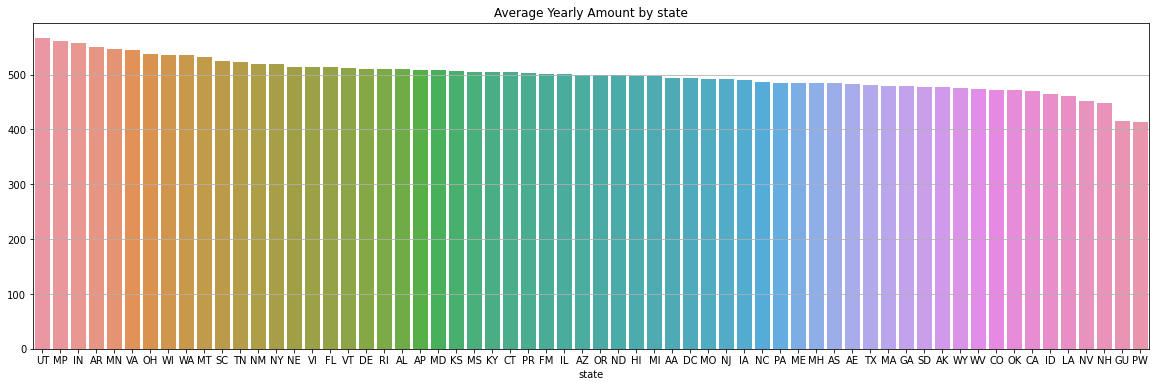

In [59]:
order_avg =  customer_df.groupby(['state'])['Yearly Amount Spent'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,6))
# Add title
plt.title("Average Yearly Amount by state")
plt.grid()
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=order_avg.index, y=order_avg.values)


<AxesSubplot:title={'center':'Total Yearly Amount by state'}, xlabel='state'>

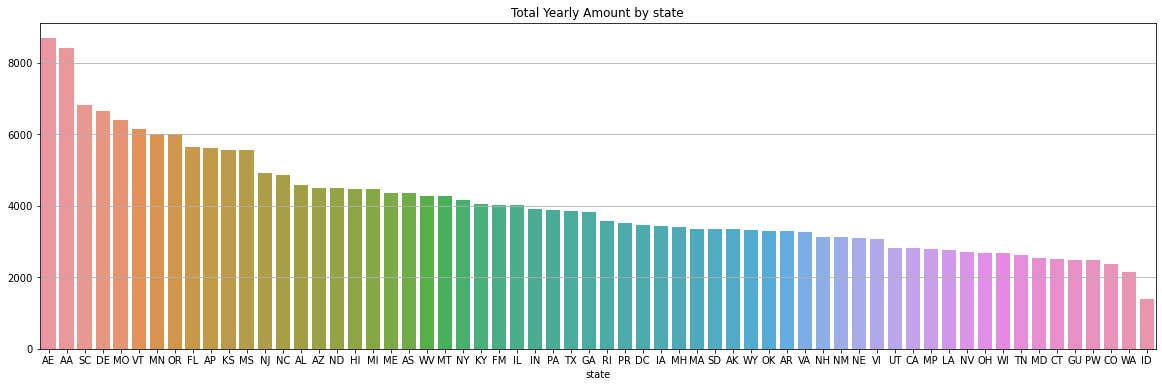

In [45]:
order_sum =  customer_df.groupby(['state'])['Yearly Amount Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(20,6))
# Add title
plt.title("Total Yearly Amount by state")
plt.grid()
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=order_sum.index, y=order_sum.values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


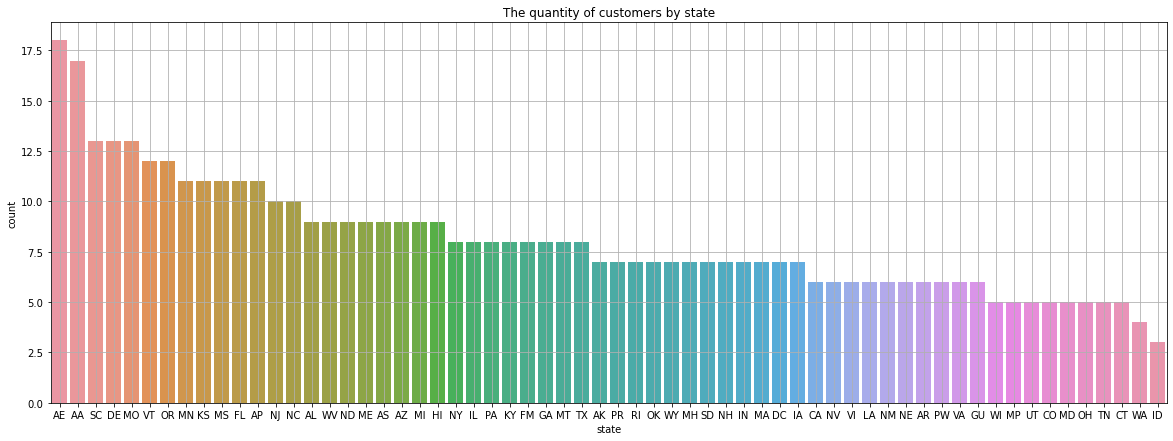

In [32]:
state_cnt = customer_df['state'].value_counts()
plt.figure(figsize = (20,7))
sns.countplot(customer_df['state'],order = customer_df['state'].value_counts().index)
plt.title('The quantity of customers by state')
plt.grid()
plt.show()

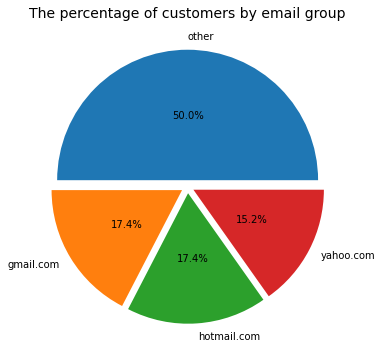

In [26]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=customer_df['domain_group'].value_counts() , autopct="%.1f%%", explode=[0.05]*4, labels=customer_df['domain_group'].value_counts().index.tolist(), pctdistance=0.5)
plt.title("The percentage of customers by email group", fontsize=14);
# pie.savefig("DeliveryPieChart.png")

Text(0.5, 1.0, "Relation of 'Yearly Amount Spent' and 'email_group'")

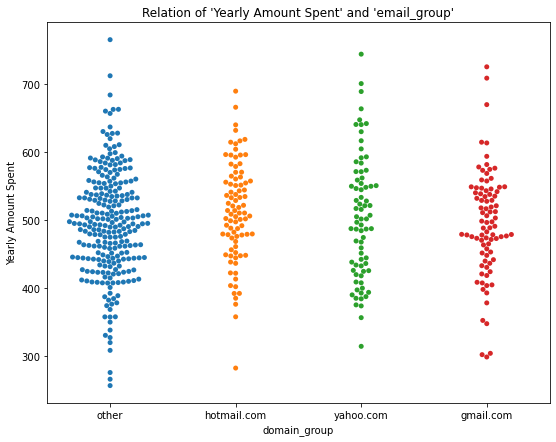

In [27]:
# Biểu đô tương quan giữa 'Yearly Amount Spent' với 'email_group'
plt.figure(figsize = (9,7))

sns.swarmplot(x=customer_df['domain_group'],
              y=customer_df['Yearly Amount Spent'])#, order = np.sort(customer_df['domain_group'].unique()))
plt.title("Relation of 'Yearly Amount Spent' and 'email_group'")


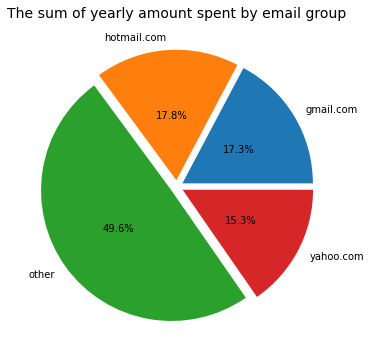

In [40]:
#Using matplotlib
a = customer_df.groupby('domain_group')['Yearly Amount Spent'].sum()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=a , autopct="%.1f%%", explode=[0.05]*4, labels=a.index.tolist(), pctdistance=0.5)
plt.title("The sum of yearly amount spent by email group", fontsize=14);

<AxesSubplot:xlabel='domain_group'>

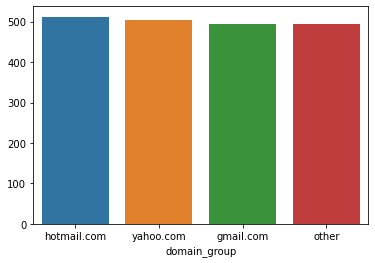

In [46]:
# Trung bình 1 người dùng email domain như vây thì chi phí bao nhiêu:
a = customer_df.groupby('domain_group')['Yearly Amount Spent'].mean().sort_values(ascending=False)
sns.barplot(x=a.index, y=a.values)

### TODO #1: EDA - Multivariate Analysis
1. State:
    * Có sự chênh lệnh về số lượng khách hàng và tồng chi tiêu hằng năm của các khách hàng thuộc các tiểu bang.
    * Không có sự chênh lệch lớn giữa trung bình chi tiêu hằng năm của khách hàng giữa các tiểu bang

2. Email:
    * Có nhiều khách hàng dùng gmail, hotmail và yahoo, và tỉ lệ người dùng sử dụng mỗi tên miền này chiếm khoảng 17% tổng số khách hàng
    * Tổng doanh thu của các khách hàng dùng các email domain này chiếm khoảng từ 15% đến 17% tổng doanh thu
    * Không có sự chênh lệnh rõ ràng trong trung bình chi tiêu hằng năm giữa những khách hàng thuộc các nhóm email khác nhau


In [30]:
# #import scipy.stats as stats
# sns.jointplot(x='Time on App', y='Yearly Amount Spent', data= customer_df,)#.annotate(stats.pearsonr)

In [61]:
# customer_df.to_csv('customer_df.csv',index=False)

In [60]:
data = customer_df.copy() # use data for next steps

In [427]:
# from pandas_profiling import ProfileReport
# pr = ProfileReport(diamond_customer_df , explorative=True)
# pr

## TODO 2: LINEAR REGRESSIONS
Xem lại Lab về Linear Regressions. Tìm hiểu thêm các notebook khác trên Kaggle. 

Thực hiện bài toán Linear Regression với biến target (y) là `Yearly Amount Spent`. 
Lưu ý trình bày đầy đủ các bước:
* Data Processing
* Split Train & Test Data
* Modeling
* Evaluation

### Data Processing: Normalize

This would be based on EDA:

1. Outliers: remove or replace outliers >95th percentiles, and <5th percentiles by the values of 5th and 95th
2. Distributions: normalize the scale
3. Missing: impute (median, or some intuitive values)


In [62]:
# transform để đưa về gần chuẩn: giảm biên độ, đưa về hình chuông
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
nomalize_lst = ['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']
for col in nomalize_lst:
    data[col] = min_max_scaler.fit_transform(data[[col]])

In [63]:
data[nomalize_lst].head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.751425,0.626620,0.929816,0.573101
1,0.362306,0.393016,0.550801,0.359869
2,0.524953,0.426378,0.524803,0.576396
3,0.722409,0.787050,0.460890,0.428434
4,0.574861,0.647702,0.594748,0.627768


In [ ]:
### Data Processing: Visualize Normalized Data

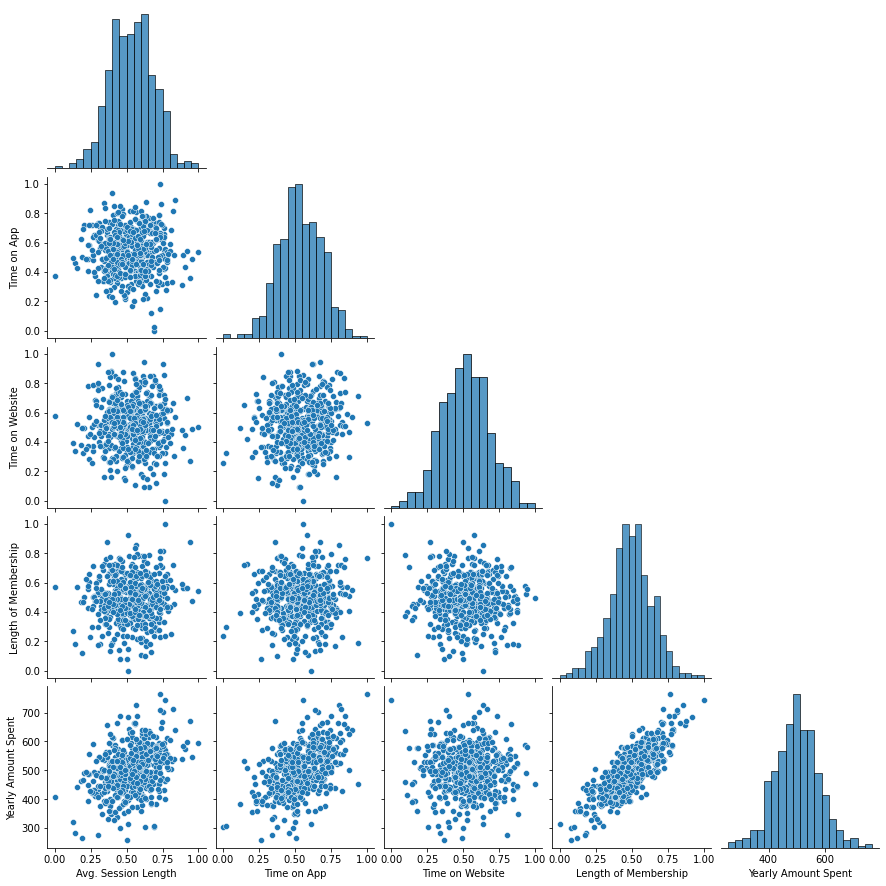

In [43]:
sns.pairplot(data[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership','Yearly Amount Spent']],corner=True);

### Split Train & Test Data: 70% Train - 30% Test

In [64]:
from sklearn.model_selection import train_test_split

X=data[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]
Y=data['Yearly Amount Spent']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Modeling: LinearRegression y = f(X)


In [65]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)

In [66]:
coef=pd.DataFrame([X_train.columns, reg.coef_]).T
coef=coef.rename(columns={0:'Attributes',1:'Coefficients'})
coef

,Attributes,Coefficients
0,Avg. Session Length,171.666
1,Time on App,255.422
2,Time on Website,1.15982
3,Length of Membership,407.677


Predictions: y_pred = f(X_test)

In [68]:
Ytest_pred = reg.predict(X_test)

### Evaluation: Y_test vs Ytest_pred

In [69]:
from sklearn import metrics

lin_acc=metrics.r2_score(Ytest_pred, Y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(Ytest_pred, Y_test))
print("MSE: ", metrics.mean_squared_error(Ytest_pred, Y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Ytest_pred, Y_test)))
print("Max Error: ", metrics.max_error(Ytest_pred, Y_test))

R^2:  0.9887048930831261
MAE:  7.228148653430847
MSE:  79.81305165097477
RMSE:  8.933815066978651
Max Error:  29.99857192295258


In [ ]:
### Evaluation: Visualize

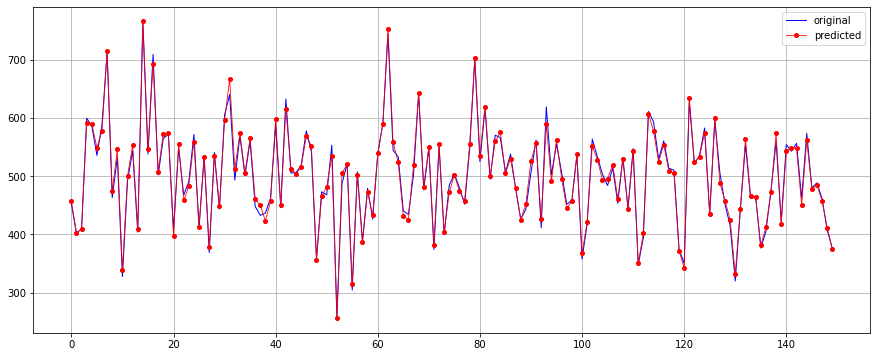

In [70]:
plt.figure(figsize = (15,6))
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, lw=1, color="blue", label="original")
plt.plot(x_ax, Ytest_pred, lw=0.8, color="red", label="predicted",marker="o", markersize=4)
plt.legend()
plt.grid()
plt.show()

In [71]:
df_plot = pd.DataFrame({'pred_Amount': Ytest_pred, 'actual_Amount': Y_test})
df_plot.head()

,pred_Amount,actual_Amount
18,456.441861,452.315675
361,402.720053,401.033135
104,409.253154,410.069611
4,591.431034,599.406092
156,590.014373,586.155870


<Figure size 432x288 with 0 Axes>

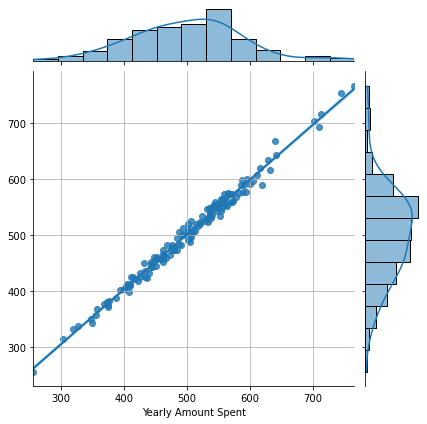

In [585]:
plt.figure(figsize = (6,4))
# sns.scatterplot(x = Y_test, y = Ytest_pred)
sns.jointplot(x= Y_test,y= Ytest_pred,kind='reg')
#plt.title('Scatterplot between Y_test and Ytest_pred')
plt.grid()

In [559]:
# from sklearn.metrics import accuracy_score
# accuracy_score(Y_test,Ytest_pred)

## TODO 3: CUSTOMER CLUSTERING
Tham khảo notebook sau: [Clustering with K-Means](https://www.kaggle.com/ryanholbrook/clustering-with-k-means#k-Means-Clustering)

* Áp dụng phương pháp Clustering lên bộ data để chia customers thành n nhóm (n tuỳ theo bạn lựa chọn)
* Trên n nhóm đã phân ra bằng clustering, trình bày chỉ số thông kê và phân phối của các biến sau: `Time on App`, `Avg. Session Length`, `Time on Website`, `Length of Membership`
* Visualize plot các yếu tố trên theo cặp. Ví dụ như bên dưới (cluster = các nhóm khác hàng đã chia)
![clustering](../img/clustering.png)
* Trình bày các quyết định, chiến lược kinh doanh có thể thực hiện dựa trên kết quả của clustering để giúp tăng doanh thu.

### Customer Clustering :n = 4 groups

In [190]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

k = 4

X = customer_df.copy()
y = X.pop("Yearly Amount Spent")

# Define a list of the features to be used for the clustering
features = ["Time on App", "Avg. Session Length", "Time on Website", "Length of Membership"]

# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)# Normalize to get the standard distribution

# Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
X["cluster"] = kmeans.fit_predict(X_scaled)

In [191]:
X['cluster'].value_counts()

0    132
2    131
3    122
1    115
Name: cluster, dtype: int64

### Distribution and Statistic: Time on App, Avg. Session Length, Time on Website, Length of Membership by clusters

In [192]:
def summary_cluster(X, clus):
    features = ["Time on App", "Avg. Session Length", "Time on Website", "Length of Membership"]
    df = X[X.cluster == clus ][["Time on App", "Avg. Session Length", "Time on Website", "Length of Membership"]]
           
    print('Summary of cluster ' + str(clus))
    print(df.describe(percentiles= [.25, .5, .75, .95], include='all'))
    

In [193]:
features = ["Time on App", "Avg. Session Length", "Time on Website", "Length of Membership"]

clusters = sorted(X['cluster'].astype("category").unique(),reverse=False)

for clus in clusters:
    summary_cluster(X, clus)
    print()

Summary of cluster 0
       Time on App  Avg. Session Length  Time on Website  Length of Membership
count   132.000000           132.000000       132.000000            132.000000
mean     11.980376            32.230241        37.474956              2.747426
std       0.828391             0.788697         0.825080              0.856745
min      10.079463            29.532429        35.907721              0.269901
25%      11.436192            31.826234        36.934560              2.255302
50%      11.933209            32.230939        37.370577              2.893878
75%      12.536795            32.697422        37.953038              3.430285
95%      13.272913            33.573887        39.055825              3.860656
max      14.715388            34.394327        40.005182              4.238296

Summary of cluster 1
       Time on App  Avg. Session Length  Time on Website  Length of Membership
count   115.000000           115.000000       115.000000            115.000000
mean     

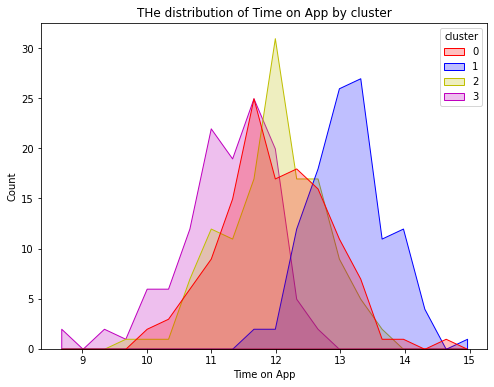

In [230]:
plt.figure(figsize = (8,6))
sns.histplot(X, x="Time on App", hue="cluster", element="poly", palette = ['r','b','y','m']);
plt.title('THe distribution of Time on App by cluster');

Distribution on Cluster 0


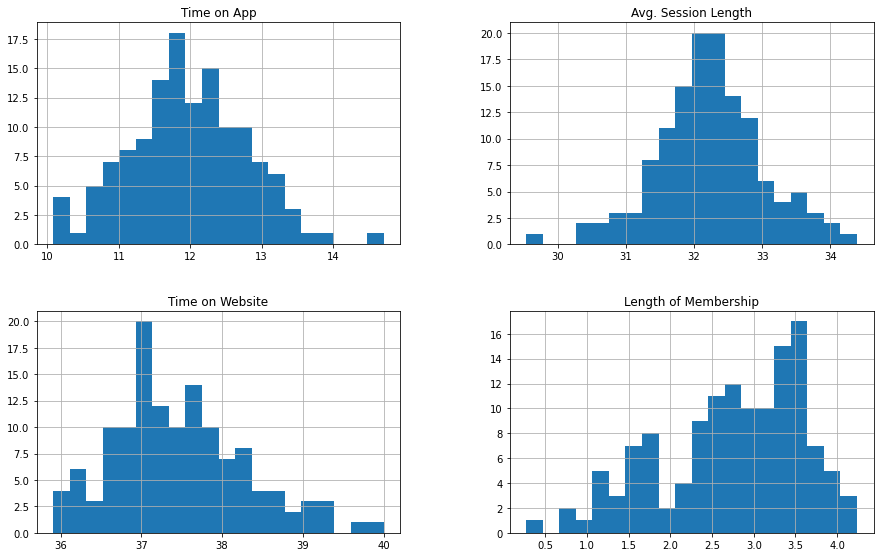

In [216]:
print("Distribution on Cluster 0")   

df = X[X.cluster == clusters[0]][features]

df.hist(bins=20, figsize= (15,20), layout=(4, 2));

Distribution on Cluster 1


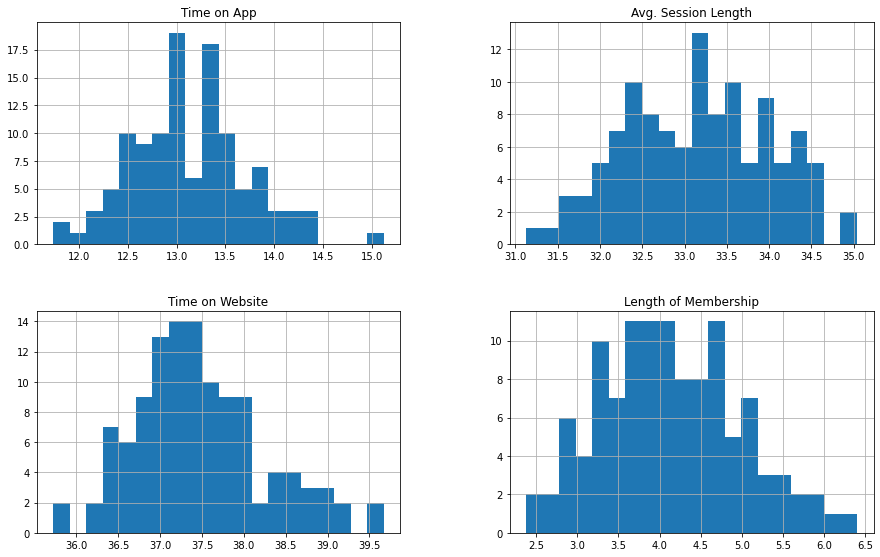

In [207]:
print("Distribution on Cluster 1")   

df = X[X.cluster == clusters[1]][features]

df.hist(bins=20, figsize= (15,20), layout=(4, 2));

Distribution on Cluster 2


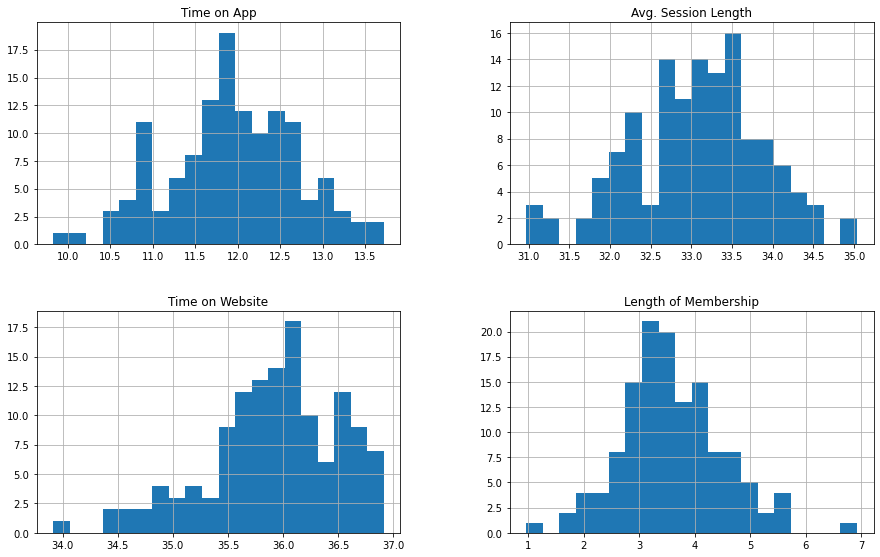

In [208]:
print("Distribution on Cluster 2")   

df = X[X.cluster == clusters[2]][features]

df.hist(bins=20, figsize= (15,20), layout=(4, 2));

Distribution on Cluster 3


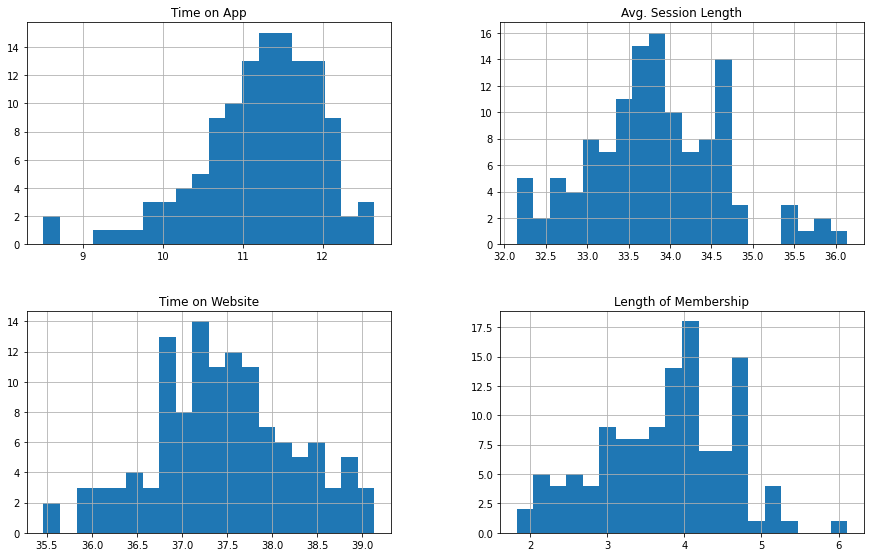

In [209]:
print("Distribution on Cluster 3")   

df = X[X.cluster == clusters[3]][features]

df.hist(bins=20, figsize= (15,20), layout=(4, 2));

### Visualize by clusters

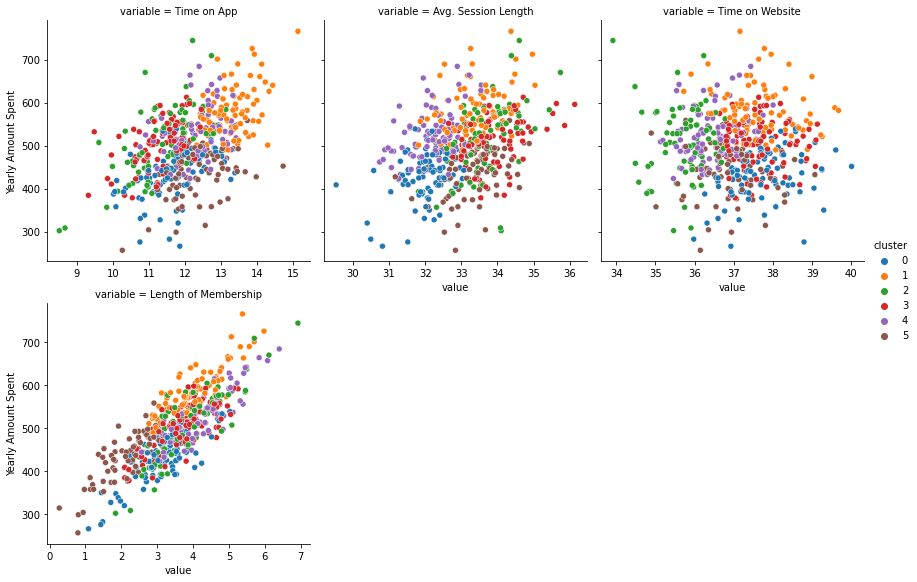

In [172]:
features = ["Time on App", "Avg. Session Length", "Time on Website", "Length of Membership"]

Xy = X.copy()
Xy["cluster"] = Xy.cluster.astype("category")
Xy["Yearly Amount Spent"] = y

i = 0
# Biểu đồ phân tán với color-code
# for i in features:
#     sns.relplot(x=i, y="Yearly Amount Spent", data=Xy, hue = "cluster",  height = 6 ) 

sns.relplot(
    x="value", y="Yearly Amount Spent", hue="cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["Yearly Amount Spent", "cluster"]
    )
);

## TODO 4 (OPTIONAL) DECISION TREE
* Tạo biến `HighVal_Cust` (High-value Customers) là những khách hàng có `Yearly Amount Spent` > 80% percentiles của mẫu data. 
* Tham khảo notebook sau: [Decision-Tree Classifier Tutorial](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)
* Dùng Decision Tree để phân loại `HighVal_Cust`
* Visualize Decision Tree giúp phân loại các khách hàng có giá trị cao.
![decisiontree](../img/decisiontree.png)

### Tạo biến HighVal_Cust 
(High-value Customers) là những khách hàng có Yearly Amount Spent > 80% percentiles của mẫu data.

In [12]:
data = customer_df.copy()
thresh_amount = customer_df['Yearly Amount Spent'].describe(percentiles = [.8]).loc['80%']

data['highVal_cus'] = data['Yearly Amount Spent']>thresh_amount
data['highVal_cus'].sum()

100

### Normalize data

In [13]:
# transform để đưa về gần chuẩn: giảm biên độ, đưa về hình chuông
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
# nomalize_lst = ['Avg. Session Length', 'Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
nomalize_lst = ['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']
for col in nomalize_lst:
    data[col] = min_max_scaler.fit_transform(data[[col]])

### Split data to train and Test

In [14]:
# Declare feature vector and target variable
# features = ['Avg. Session Length', 'Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
features = ['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']
X = data[features]
Y = data['highVal_cus']

In [15]:
Y.head(5)

0     True
1    False
2    False
3     True
4     True
Name: highVal_cus, dtype: bool

In [16]:
# Split data into separate training and test set  70 Train: 30 Test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((350, 4), (150, 4))

In [17]:
Y_test.head()

361    False
73     False
374    False
155    False
104    False
Name: highVal_cus, dtype: bool

### Decision Tree
để phân loại HighVal_Cust

In [20]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [44]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [45]:
Y_pred_gini = clf_gini.predict(X_test)

In [35]:
Y_test.head()

361    False
73     False
374    False
155    False
104    False
Name: highVal_cus, dtype: bool

### Check accuracy score with criterion gini index

In [46]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index: 0.9067


### Compare the train-set and test-set accuracy

In [37]:
Y_pred_train_gini = clf_gini.predict(X_train)

# Y_pred_train_gini

In [47]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train_gini)))

Training-set accuracy score: 0.9514


### Check for overfitting and underfitting

In [48]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.9171
Test set score: 0.9067


The training-set accuracy score is 0.9171 while the test-set accuracy to be 0.9067 --> there is no sign of overfitting.

### Visualize Decision Tree
 giúp phân loại các khách hàng có giá trị cao

In [300]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

[Text(283.2923076923077, 380.52, 'X[3] <= 0.548\ngini = 0.346\nsamples = 350\nvalue = [272, 78]'),
 Text(103.01538461538462, 271.8, 'X[1] <= 0.656\ngini = 0.116\nsamples = 226\nvalue = [212, 14]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 176\nvalue = [176, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'X[3] <= 0.423\ngini = 0.403\nsamples = 50\nvalue = [36, 14]'),
 Text(103.01538461538462, 54.360000000000014, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(206.03076923076924, 54.360000000000014, 'gini = 0.5\nsamples = 28\nvalue = [14, 14]'),
 Text(463.5692307692308, 271.8, 'X[1] <= 0.527\ngini = 0.499\nsamples = 124\nvalue = [60, 64]'),
 Text(360.55384615384617, 163.07999999999998, 'X[3] <= 0.739\ngini = 0.32\nsamples = 60\nvalue = [48, 12]'),
 Text(309.04615384615386, 54.360000000000014, 'gini = 0.226\nsamples = 54\nvalue = [47, 7]'),
 Text(412.0615384615385, 54.360000000000014, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(566.5846153846154

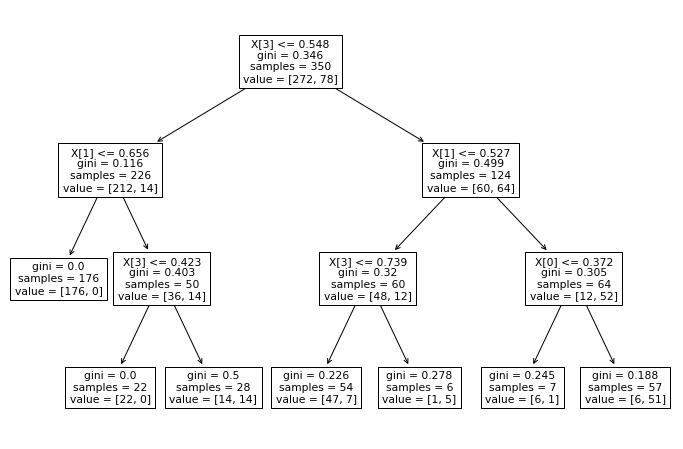

In [49]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, Y_train)) 